## Feature 7 days sales forecast(Take Redbull data as an example)

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [610]:
data = pd.read_csv(r'resales_cleaned.csv')

In [17]:
sm.__version__

'0.13.5'

In [611]:
data.head()

,day,cola_300ml,cola_600ml,guazi,haipai_hainorim,haipiao_haibo,redbull,haixiangcuilan,luosifen_335g,qiaqia_oatmeal,spicy_chicken_noodle,TeLunSuMilk,wangzai_milk,xiangbage_honey_chicken_wings
0,2020/4/1,0.0,1.0,1.0,1.0,1.0,7.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0
1,2020/4/2,4.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0
2,2020/4/3,1.0,0.0,0.0,1.0,1.0,11.0,8.0,0.0,0.0,0.0,2.0,5.0,2.0
3,2020/4/4,2.0,0.0,0.0,2.0,0.0,12.0,4.0,5.0,0.0,1.0,2.0,0.0,0.0
4,2020/4/5,1.0,2.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0


In [612]:
redbull = data['redbull']

In [613]:
df = pd.concat([data['day'],redbull],axis =1)

In [614]:
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)

In [615]:
df.head()

,redbull
day,
2020-04-01,7.0
2020-04-02,3.0
2020-04-03,11.0
2020-04-04,12.0
2020-04-05,4.0


In [8]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [9]:
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

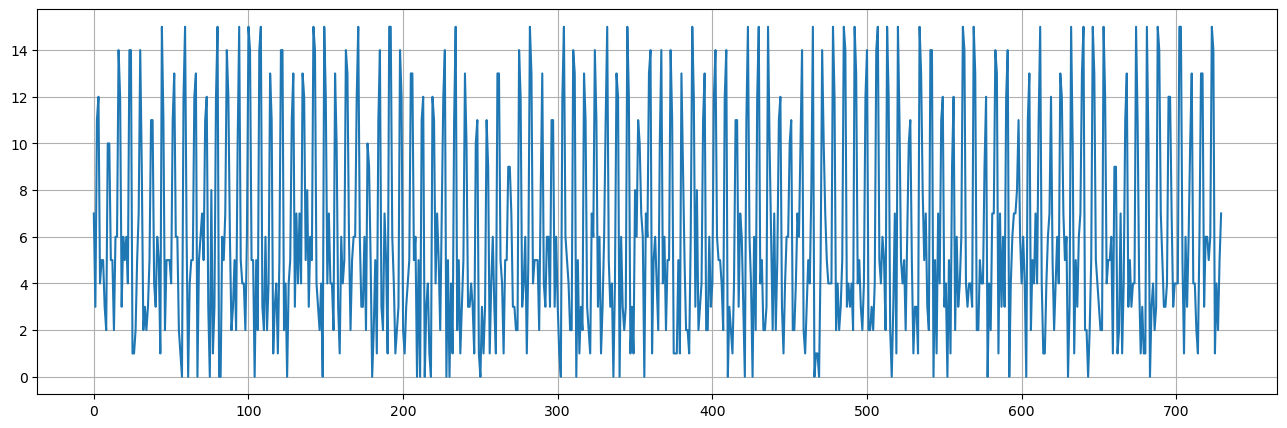

In [616]:
fig = plt.figure(figsize=(16,5))
plt.plot(range(df.shape[0]),df['redbull'])
plt.grid();

In [599]:
from statsmodels.tsa.stattools import adfuller

In [628]:
def adfuller_test(sales):
    result=adfuller(sales)

    labels = ['ADF Test Statistic','p-value']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Rejecting the null hypothesis, the data is stationary.")
    else:
        print("Unable to reject the null hypothesis, the data are non-stationary.")
        
    return result[1]

In [629]:
columns = ["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D24","D36","D52"]
pvalues = []
stds = []

for idx,degree in enumerate([*range(1,13),24,36,52]):
    print("{}".format(degree))
    
    df[columns[idx]] = df["redbull"] - df["redbull"].shift(idx+1)
    
    pvalue = adfuller_test(df[columns[idx]].dropna())
    std_ = df[columns[idx]].std()
    
    #保存P值和标准差
    pvalues.append(pvalue)
    stds.append(std_)
    
    #对结果进行打印
    print("std{}".format(std_))
    print("\n")

1
ADF Test Statistic : -12.785524375303872
p-value : 7.26082761364654e-24
Rejecting the null hypothesis, the data is stationary.
std5.575160767405509


2
ADF Test Statistic : -10.426608977770412
p-value : 1.651454147642695e-18
Rejecting the null hypothesis, the data is stationary.
std7.293983360793352


3
ADF Test Statistic : -10.804858485457446
p-value : 1.9751405648868866e-19
Rejecting the null hypothesis, the data is stationary.
std7.297961204382207


4
ADF Test Statistic : -9.603271026287437
p-value : 1.8954801035308064e-16
Rejecting the null hypothesis, the data is stationary.
std7.289736770484785


5
ADF Test Statistic : -8.958805923448802
p-value : 8.332234843657315e-15
Rejecting the null hypothesis, the data is stationary.
std7.277221054460353


6
ADF Test Statistic : -7.306577174883502
p-value : 1.2967965479764466e-10
Rejecting the null hypothesis, the data is stationary.
std5.588826053383221


7
ADF Test Statistic : -10.131788865150273
p-value : 8.878460688033057e-18
Rejectin

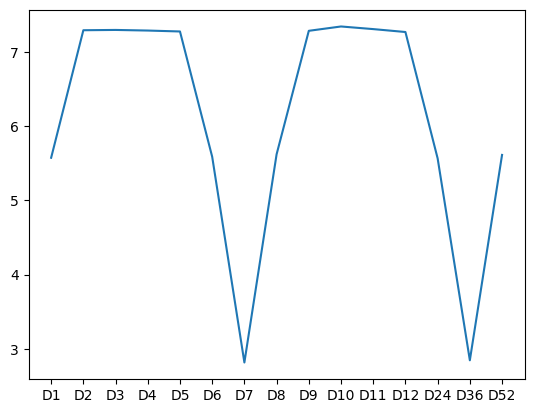

In [630]:
plt.plot(columns,stds);

7 is the minimal

In [617]:
train, test = model_selection.train_test_split(df,train_size = 690)

In [618]:
arima = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,
              seasonal=True, m=7,
              maxiter=5,  
              )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=23208.225, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4037.218, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3448.235, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3676.901, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4757.742, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=4003.651, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=3688.795, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=6778.657, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=3689.193, Time=0.05 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=6304.848, Time=0.16 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=3738.408, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=3773.107, Time=0.11 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=3419.559, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=3953.088, Time=0.04 sec
 ARIMA(1,0,1)(2,0,0)[7] intercep

In [619]:
preds = arima.predict(n_periods=test.shape[0])

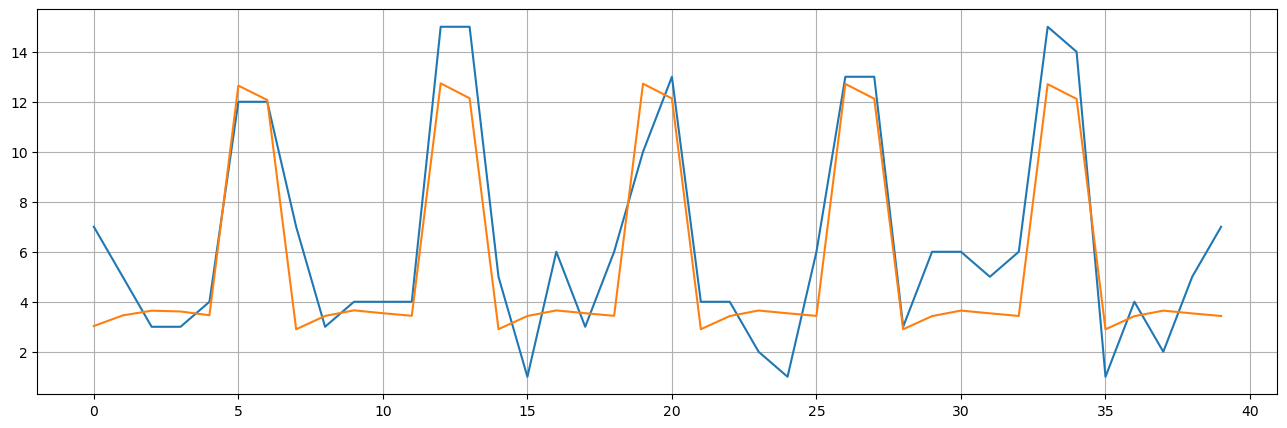

In [620]:
fig = plt.figure(figsize=(16,5))
plt.plot(range(test.shape[0]),test)
plt.plot(range(test.shape[0]),preds)
plt.grid();

## SildingWindowForecastCV

In [621]:
cv = model_selection.SlidingWindowForecastCV(h=7,step =20, window_size = 600)

In [622]:
model = pm.ARIMA(order=(0,0,0),seasonal_order=(2,0,1,7),max_iter = 500)
predictions = model_selection.cross_validate(model,
                                             df,
                                             cv =cv,
                                             scoring = 'mean_squared_error', 
                                             verbose = 2, 
                                             error_score = 'raise')

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................


In [623]:
np.sqrt(predictions['test_score'])

array([3.21789828, 2.83004962, 2.3670112 , 3.30101359, 2.43490346,
       2.05733274, 1.96880042])

## Predict future 7 days sales

In [626]:
model.fit(df['redbull'])
preds = model.predict(n_periods = 7)
print(preds)

2022-04-01    14.249062
2022-04-02    13.417699
2022-04-03     1.539814
2022-04-04     4.069752
2022-04-05     2.393161
2022-04-06     4.920094
2022-04-07     6.576831
Freq: D, dtype: float64


## Conclusion

基于对所有商品销量的最终预测，我建议店家：

- $库存管理$  
优化库存：根据预测数据调整库存水平，确保在销量预期高的日子有足够的库存，同时避免过度库存以减少积压和可能的损失。
- $促销和定价策略$  
定时促销：在预测销量较低的日子进行促销活动，如打折、买一赠一等，以刺激消费者的购买意愿，提高销量。
- $客户体验$  
多渠道销售：根据分析得知，许多商品工作日的销量可能比较低，可能是消费者工作日不方便进行线下消费，所以可以通过线上渠道（官方网站、电商平台）销售，覆盖更广泛的顾客群体。

According to the prediction on all the products, I suggest the sotre owner:

- $Inventory Management$  
Optimize Inventory: Adjust inventory levels based on forecast data to ensure sufficient stock on days with high expected sales, while avoiding overstocking to reduce the risk of backlog and potential losses.  

- $Promotion and Pricing Strategy$     
Timed Promotions: Conduct promotional activities on days with predicted lower sales, including discounts, buy-one-get-one-free offers, etc., to stimulate consumer buying interest and increase sales volume.  

- $Customer Experience$    
Multi-Channel Sales: Analysis indicates that sales are possibly lower on weekdays, possibly due to inconvenience for consumers to shop offline during weekdays. Therefore, sales through online channels (official website, e-commerce platforms) can be expanded to cover a wider customer base.